In [2]:
import pandas as pd
import numpy as np
import json
import requests
import pprint 
import random
from datetime import datetime
import seaborn as sns

In [3]:
#get a list of users from each title category
def TitledPlayers(title):
    url = f"https://api.chess.com/pub/titled/{title}"
    response = requests.request("GET", url)
    return response.json()
gm = TitledPlayers('GM') #Grand Master
im = TitledPlayers('IM') #International Master
fm = TitledPlayers('FM') #FIDE Master
cm = TitledPlayers('CM') #Candidate Master

#get a smaller set of data to decrease load time (but keep 200 rows)
gmSmall = random.sample(gm['players'], 200)
imSmall = random.sample(im['players'], 200)
fmSmall = random.sample(fm['players'], 200)
cmSmall = random.sample(cm['players'], 200)

#combine all names
titles = [gmSmall, imSmall, fmSmall, cmSmall]

In [4]:
#MAIN CELL
start = datetime.now()
data = []
userTitle = ''
for title in titles: #loops through each of the titles (gm, im, fm, cm)
    users = title
    # in the following code block, define which title each player has based on which part of the loop it is in
    if title == titles[0]:
        userTitle = 'gm'
    elif title == titles[1]:
        userTitle = 'im'
    elif title == titles[2]:
        userTitle = 'fm'
    elif title == titles[3]:
        userTitle = 'cm'
    for user in users: #loops through each user in the category
        #hitting chess.com API to get each month that a player has games
        url = f'https://api.chess.com/pub/player/{user}/games/archives'
        response = requests.request("GET", url)
        archives = response.json()
        
        #take just the first month returned so that there isn't an astronomical amount of data
        monthurls = archives['archives'][:1]

        gameslist = []
        for url in monthurls: #loop through each month
            response = requests.request("GET", url)
            gameslist.append(response.json()) #create a list of games for each player
        white = []
        black = []
        for gamelist in gameslist: #loop through each list of games
            games = gamelist['games']
            for game in games: #within each list of games, get each game
                #get wins as white and wins as black
                if game['white']['username'] == user:
                    if game['white']['result'] == 'win':
                        white.append(1)
                    else:
                        white.append(0)
                else:
                    if game['black']['result'] == 'win':
                        black.append(1)
                    else:
                        black.append(0)    
        
        totalGames = white + black
        numGames = len(totalGames)
        winRate = np.mean(totalGames)
        numWhite = len(white)
        whiteRate = np.mean(white)
        numBlack = len(black)
        blackRate = np.mean(black)
        
        #create final data object from which we will create a data frame and do some analysis
        data.append([user, userTitle, numGames, winRate, numWhite, whiteRate, numBlack, blackRate])
    
time = datetime.now() - start 
print(time)

C:\Users\GavinHatch\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\GavinHatch\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0:20:19.599767


In [5]:
len(data)

800

In [6]:
#create dataframe and make sure it works!
chess = pd.DataFrame(data, columns=['username', 'title', 'numGames', 'winRate', 'numWhite', 'whiteRate', 'numBlack', 'blackRate'])

In [7]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   username   800 non-null    object 
 1   title      800 non-null    object 
 2   numGames   800 non-null    int64  
 3   winRate    787 non-null    float64
 4   numWhite   800 non-null    int64  
 5   whiteRate  288 non-null    float64
 6   numBlack   800 non-null    int64  
 7   blackRate  765 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 50.1+ KB


In [8]:
chess.to_csv('chess.csv')

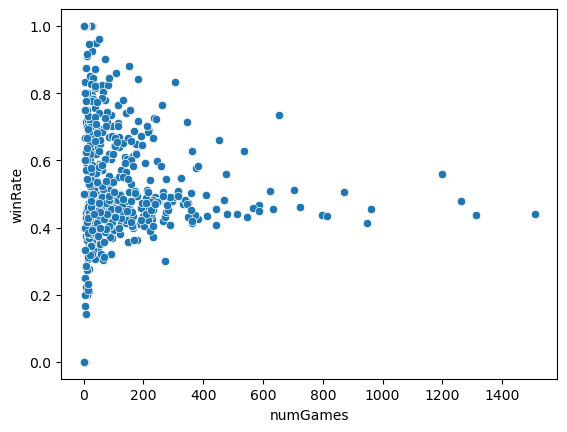

In [10]:
sns.scatterplot(data=chess, x='numGames', y = 'winRate');
# plt.ylabel('Win Rate')

#scatter plot of 
#bar graph of different win rates
#


In [ ]:
#opening moves
#if castle
#bad moves
#queen movement

<AxesSubplot:xlabel='title', ylabel='winRate'>

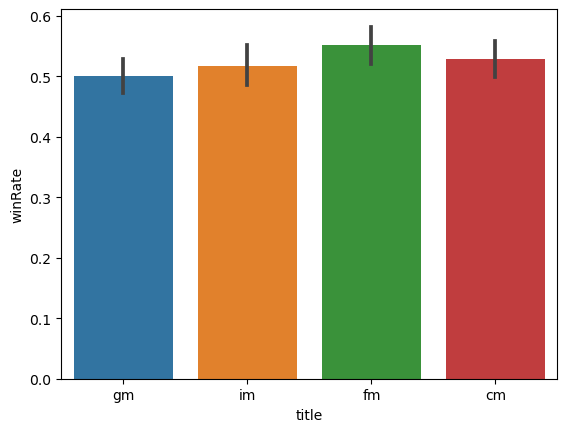

In [12]:
sns.barplot(data=chess, x='title', y = 'winRate')

<AxesSubplot:xlabel='title', ylabel='numGames'>

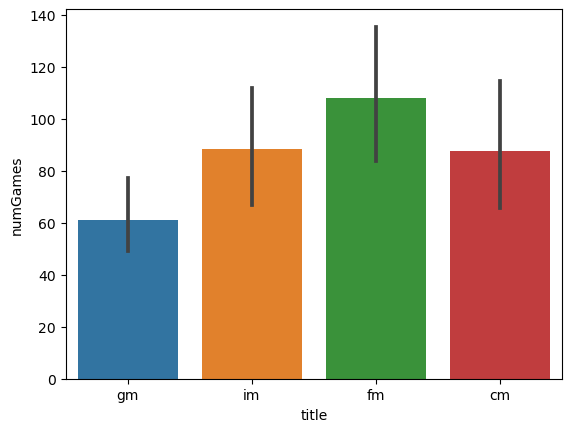

In [14]:
sns.barplot(data=chess, x='title', y = 'numGames')

In [16]:
chessNew = chess.dropna()
chessNew

,username,title,numGames,winRate,numWhite,whiteRate,numBlack,blackRate
3,lilleper1,gm,19,0.684211,9,0.666667,10,0.700000
9,dogsofwar,gm,236,0.724576,120,0.741667,116,0.706897
10,msolleveld,gm,118,0.669492,55,0.709091,63,0.634921
11,devonlaratt,gm,101,0.643564,51,0.666667,50,0.620000
18,attilaczebe,gm,7,0.285714,4,0.250000,3,0.333333
...,...,...,...,...,...,...,...,...
788,remuloaguiarfreitas,cm,194,0.644330,96,0.645833,98,0.642857
792,paradise10,cm,271,0.298893,131,0.351145,140,0.250000
796,e4evr,cm,158,0.658228,80,0.612500,78,0.705128
798,trainer1957,cm,2,1.000000,1,1.000000,1,1.000000


<AxesSubplot:xlabel='title', ylabel='numGames'>

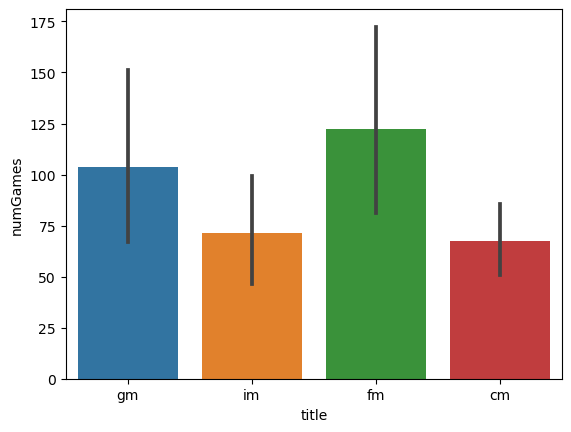

In [18]:
sns.barplot(data=chessNew, x='title', y = 'numGames')

<AxesSubplot:xlabel='title', ylabel='winRate'>

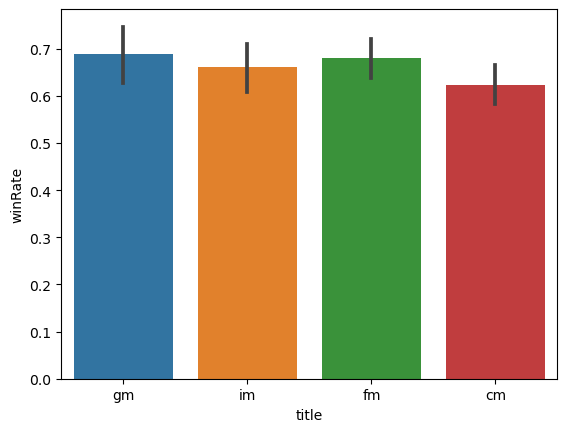

In [19]:
sns.barplot(data=chessNew, x='title', y = 'winRate')

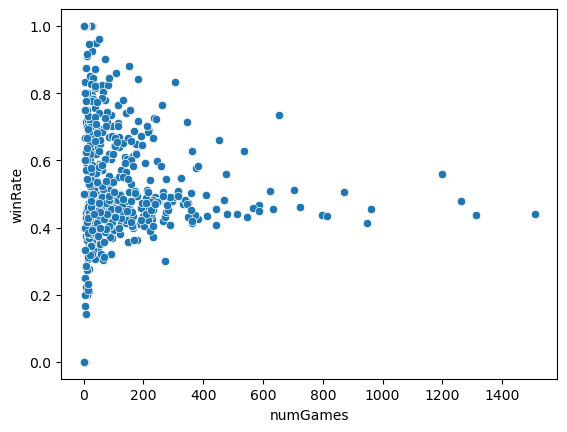

In [20]:
sns.scatterplot(data=chess, x='numGames', y = 'winRate');

<AxesSubplot:xlabel='title', ylabel='whiteRate'>

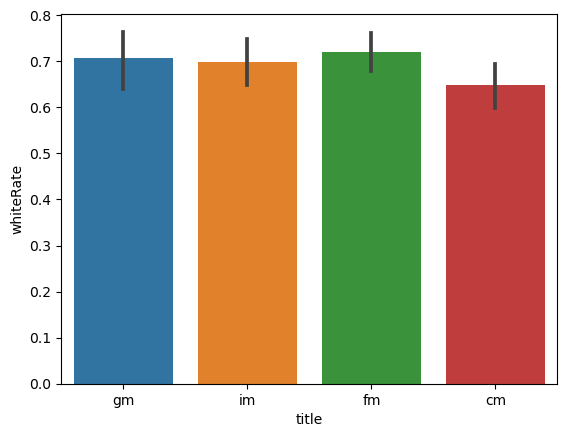

In [21]:
sns.barplot(data=chessNew, x='title', y = 'whiteRate')

<AxesSubplot:xlabel='title', ylabel='blackRate'>

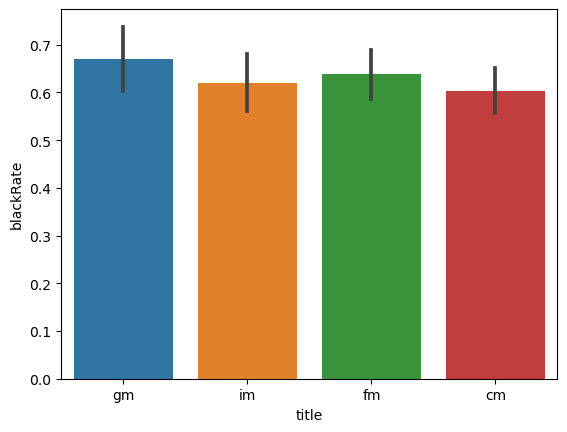

In [22]:
sns.barplot(data=chessNew, x='title', y = 'blackRate')

<AxesSubplot:xlabel='title', ylabel='winRate'>

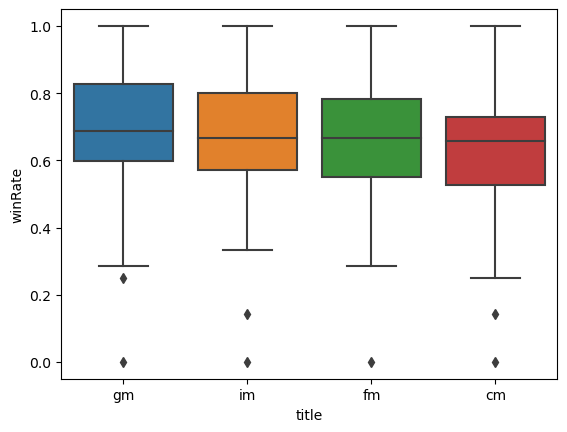

In [23]:
sns.boxplot(data=chessNew, x='title', y='winRate')

In [ ]:
#pivot

#scatter plot of numgames and winrate
#scatter plot of whitegames and whiterate
#scatter plot of blackgames and blackrate
#boxplot of title and winrate
#triple bar graph of white and black and total winrates against title
#

In [48]:
chessNew

,username,title,numGames,winRate,numWhite,whiteRate,numBlack,blackRate
3,lilleper1,gm,19,0.684211,9,0.666667,10,0.700000
9,dogsofwar,gm,236,0.724576,120,0.741667,116,0.706897
10,msolleveld,gm,118,0.669492,55,0.709091,63,0.634921
11,devonlaratt,gm,101,0.643564,51,0.666667,50,0.620000
18,attilaczebe,gm,7,0.285714,4,0.250000,3,0.333333
...,...,...,...,...,...,...,...,...
788,remuloaguiarfreitas,cm,194,0.644330,96,0.645833,98,0.642857
792,paradise10,cm,271,0.298893,131,0.351145,140,0.250000
796,e4evr,cm,158,0.658228,80,0.612500,78,0.705128
798,trainer1957,cm,2,1.000000,1,1.000000,1,1.000000


In [49]:
chessNewOrder = chessNew[['username','title','numGames','numWhite','numBlack','winRate','whiteRate','blackRate']]

In [50]:
chessNewLong = pd.melt(chessNewOrder, id_vars=chessNewOrder.columns[0:5], var_name='color', value_name='rate')
chessNewLong

,username,title,numGames,numWhite,numBlack,color,rate
0,lilleper1,gm,19,9,10,winRate,0.684211
1,dogsofwar,gm,236,120,116,winRate,0.724576
2,msolleveld,gm,118,55,63,winRate,0.669492
3,devonlaratt,gm,101,51,50,winRate,0.643564
4,attilaczebe,gm,7,4,3,winRate,0.285714
...,...,...,...,...,...,...,...
793,remuloaguiarfreitas,cm,194,96,98,blackRate,0.642857
794,paradise10,cm,271,131,140,blackRate,0.250000
795,e4evr,cm,158,80,78,blackRate,0.705128
796,trainer1957,cm,2,1,1,blackRate,1.000000


In [51]:
chessNewLongOrder = chessNewLong[['username','title','color','rate','numGames','numWhite','numBlack']]
chessNewLongOrder

,username,title,color,rate,numGames,numWhite,numBlack
0,lilleper1,gm,winRate,0.684211,19,9,10
1,dogsofwar,gm,winRate,0.724576,236,120,116
2,msolleveld,gm,winRate,0.669492,118,55,63
3,devonlaratt,gm,winRate,0.643564,101,51,50
4,attilaczebe,gm,winRate,0.285714,7,4,3
...,...,...,...,...,...,...,...
793,remuloaguiarfreitas,cm,blackRate,0.642857,194,96,98
794,paradise10,cm,blackRate,0.250000,271,131,140
795,e4evr,cm,blackRate,0.705128,158,80,78
796,trainer1957,cm,blackRate,1.000000,2,1,1


In [52]:
chessNewLongOrder = pd.melt(chessNewLongOrder, id_vars=chessNewLongOrder.columns[0:4], var_name='pieceColor', value_name='numGames')
chessNewLongOrder

C:\Users\GavinHatch\AppData\Local\Temp\ipykernel_28100\3116114793.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  chessNewLongOrder = pd.melt(chessNewLongOrder, id_vars=chessNewLongOrder.columns[0:4], var_name='pieceColor', value_name='numGames')


,username,title,color,rate,pieceColor,numGames
0,lilleper1,gm,winRate,0.684211,numGames,19
1,dogsofwar,gm,winRate,0.724576,numGames,236
2,msolleveld,gm,winRate,0.669492,numGames,118
3,devonlaratt,gm,winRate,0.643564,numGames,101
4,attilaczebe,gm,winRate,0.285714,numGames,7
...,...,...,...,...,...,...
2389,remuloaguiarfreitas,cm,blackRate,0.642857,numBlack,98
2390,paradise10,cm,blackRate,0.250000,numBlack,140
2391,e4evr,cm,blackRate,0.705128,numBlack,78
2392,trainer1957,cm,blackRate,1.000000,numBlack,1


In [53]:
chessNewLongOrder[['username','title','color','rate','numGames']]

,username,title,color,rate,numGames
0,lilleper1,gm,winRate,0.684211,19
1,dogsofwar,gm,winRate,0.724576,236
2,msolleveld,gm,winRate,0.669492,118
3,devonlaratt,gm,winRate,0.643564,101
4,attilaczebe,gm,winRate,0.285714,7
...,...,...,...,...,...
2389,remuloaguiarfreitas,cm,blackRate,0.642857,98
2390,paradise10,cm,blackRate,0.250000,140
2391,e4evr,cm,blackRate,0.705128,78
2392,trainer1957,cm,blackRate,1.000000,1


In [58]:
import re
pattern = r'Rate'
color = [re.sub(pattern,'',color) for color in chessNewLongOrder['color']] #use [1] to get rid of underscore

pattern = r'win'
colors = [re.sub(pattern,'total',c) for c in color]

chessNewLongOrder['color'] = colors
chessNewLongOrder

,username,title,color,rate,pieceColor,numGames
0,lilleper1,gm,total,0.684211,numGames,19
1,dogsofwar,gm,total,0.724576,numGames,236
2,msolleveld,gm,total,0.669492,numGames,118
3,devonlaratt,gm,total,0.643564,numGames,101
4,attilaczebe,gm,total,0.285714,numGames,7
...,...,...,...,...,...,...
2389,remuloaguiarfreitas,cm,black,0.642857,numBlack,98
2390,paradise10,cm,black,0.250000,numBlack,140
2391,e4evr,cm,black,0.705128,numBlack,78
2392,trainer1957,cm,black,1.000000,numBlack,1


In [59]:
chessFinal = chessNewLongOrder[['username','title','color','rate','numGames']]
chessFinal

,username,title,color,rate,numGames
0,lilleper1,gm,total,0.684211,19
1,dogsofwar,gm,total,0.724576,236
2,msolleveld,gm,total,0.669492,118
3,devonlaratt,gm,total,0.643564,101
4,attilaczebe,gm,total,0.285714,7
...,...,...,...,...,...
2389,remuloaguiarfreitas,cm,black,0.642857,98
2390,paradise10,cm,black,0.250000,140
2391,e4evr,cm,black,0.705128,78
2392,trainer1957,cm,black,1.000000,1


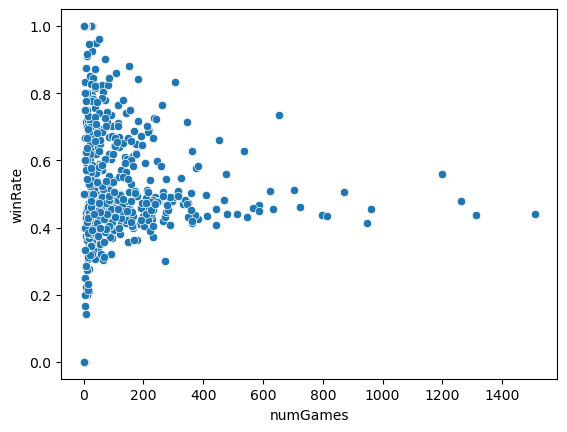

In [72]:
import matplotlib.pyplot as plt
sns.scatterplot(data=chess, x='numGames', y = 'winRate');
# plt.savefig("gamesvsrate.png")

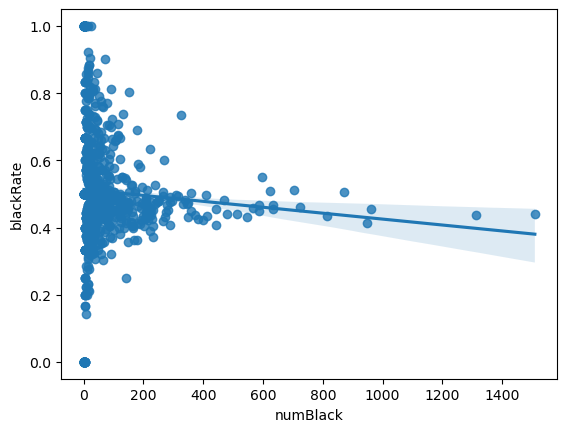

In [80]:
sns.regplot(data=chess, x='numBlack', y = 'blackRate');
plt.savefig("blackgamesvsrate.png")

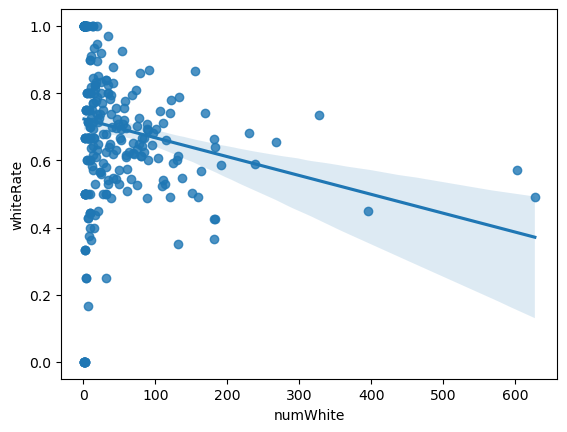

In [81]:
sns.regplot(data=chess, x='numWhite', y = 'whiteRate');
plt.savefig("whitegamesvsrate.png")

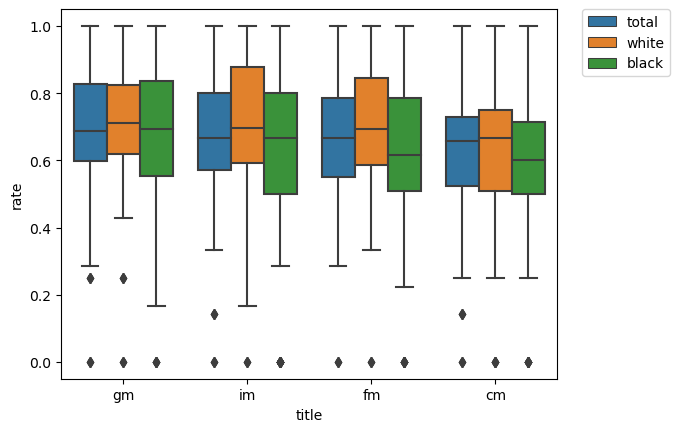

In [83]:
sns.boxplot(data=chessFinal, x='title', y='rate', hue='color')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("titlerates.png")

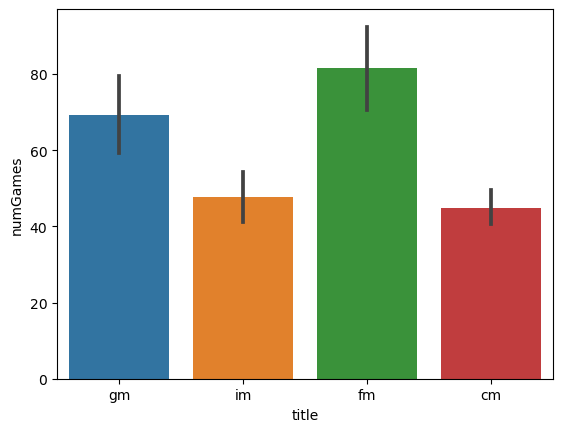

In [79]:
sns.barplot(data=chessFinal, x='title', y='numGames')
plt.savefig("titlegames.png")